In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [394]:
cars = pd.read_csv('cars45.csv')
cars.head()

,Car_Brand,Car_Model,Year,Car_Condition,Mileage,Price
0,Toyota,Corolla,2010,Nigerian Used,145695,7650000
1,Ford,Edge,2011,Foreign Used,122250,10125000
2,Honda,Accord,2010,Nigerian Used,126040,4500000
3,Mercedes-Benz,C 280,2008,Nigerian Used,380085,6750000
4,Toyota,Corolla,2007,Nigerian Used,299999,3600000


In [395]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [396]:
cars.isnull().sum()

Car_Brand        0
Car_Model        0
Year             0
Car_Condition    0
Mileage          0
Price            0
dtype: int64

In [397]:
cars.shape

(1924, 6)

In [398]:
cars.duplicated().sum()

0

In [399]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Brand      1924 non-null   object
 1   Car_Model      1924 non-null   object
 2   Year           1924 non-null   int64 
 3   Car_Condition  1924 non-null   object
 4   Mileage        1924 non-null   int64 
 5   Price          1924 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 90.3+ KB


In [400]:
cars.describe()

,Year,Mileage,Price
count,1924.000000,1924.000000,1.924000e+03
mean,2008.270790,201271.961538,7.200923e+06
std,4.534144,114695.125186,9.666021e+06
min,2000.000000,235.000000,8.400000e+05
25%,2005.000000,126360.750000,2.808000e+06
50%,2008.000000,182741.000000,4.200000e+06
75%,2011.000000,258489.500000,7.800000e+06
max,2024.000000,999999.000000,1.470000e+08


In [401]:
# Get the list of unique car brands and models
unique_car_brands = cars['Car_Brand'].unique()
unique_car_models = cars['Car_Model'].unique()

In [402]:
# Save the list of unique car brands to a text file
with open('unique_car_brands.txt', 'w') as f:
    for brand in unique_car_brands:
        f.write(f"{brand}\n")

# Save the list of unique car models to a text file
with open('unique_car_models.txt', 'w') as f:
    for model in unique_car_models:
        f.write(f"{model}\n")

In [403]:
cars.Car_Condition.unique()

array(['Nigerian Used', 'Foreign Used'], dtype=object)

In [404]:
cars.nunique()

Car_Brand          42
Car_Model         316
Year               25
Car_Condition       2
Mileage          1907
Price             498
dtype: int64

- The dataset encompasses 42 unique Car Brands with a diverse selection of 316 distinct models represented across these brands.
- The dataset exclusively features cars in two conditions: "Nigerian Used" and "Foreign Used". Notably, brand new cars are absent from this dataset, reflecting a focus on pre-owned vehicles.
- Prices within the dataset span a considerable range, from a minimum of ₦840,000 to a maximum of ₦147,000,000, showcasing the spectrum of pricing across different car models and conditions.
- The dataset's average car price stands at approximately ₦7,196,172, indicating a central tendency around this value for the cars included in the dataset.

## Exploratory Data Analysis

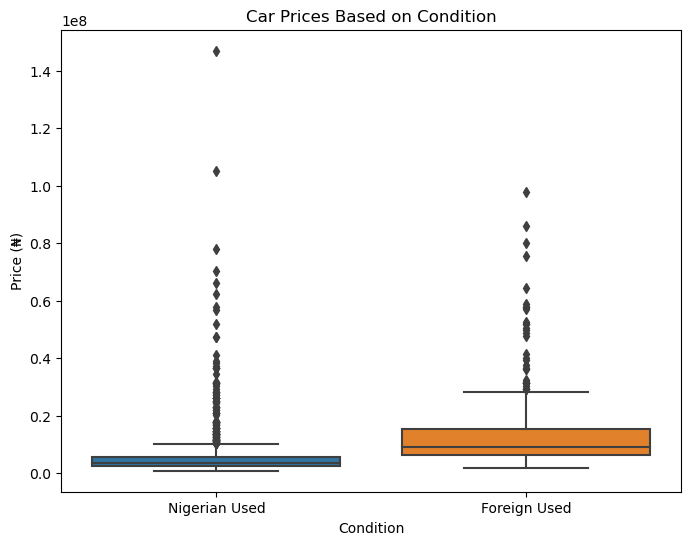

In [405]:
# Boxplot to visualize the distribution of prices based on car condition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Car_Condition', y='Price', data=cars)
plt.title('Car Prices Based on Condition')
plt.xlabel('Condition')
plt.ylabel('Price (₦)')
plt.show()

C:\Users\GreyDoer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


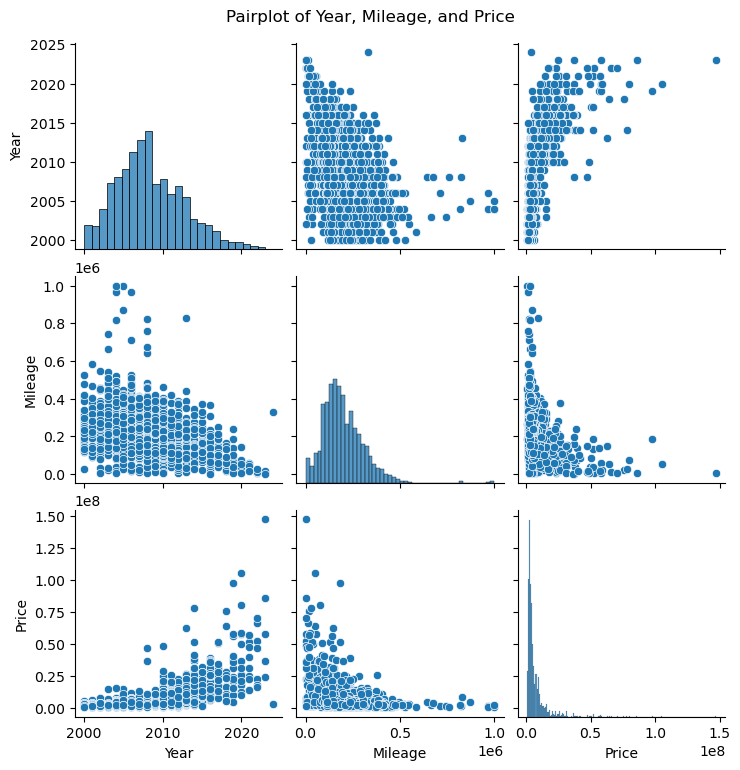

In [406]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(cars[['Year', 'Mileage', 'Price']])
plt.suptitle('Pairplot of Year, Mileage, and Price', y=1.02)
plt.show()

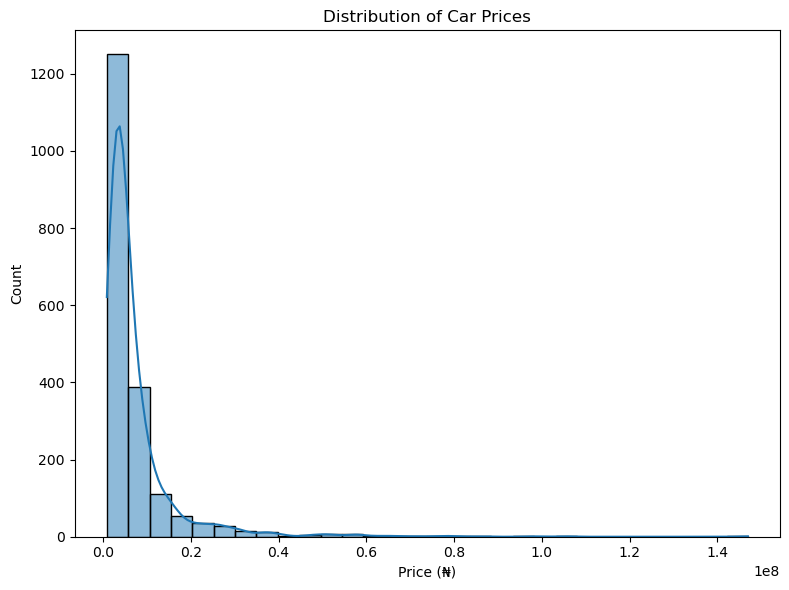

In [407]:
# Distribution of the target variable 'Price'
plt.figure(figsize=(8, 6))
sns.histplot(cars['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (₦)')
plt.tight_layout()
plt.show()

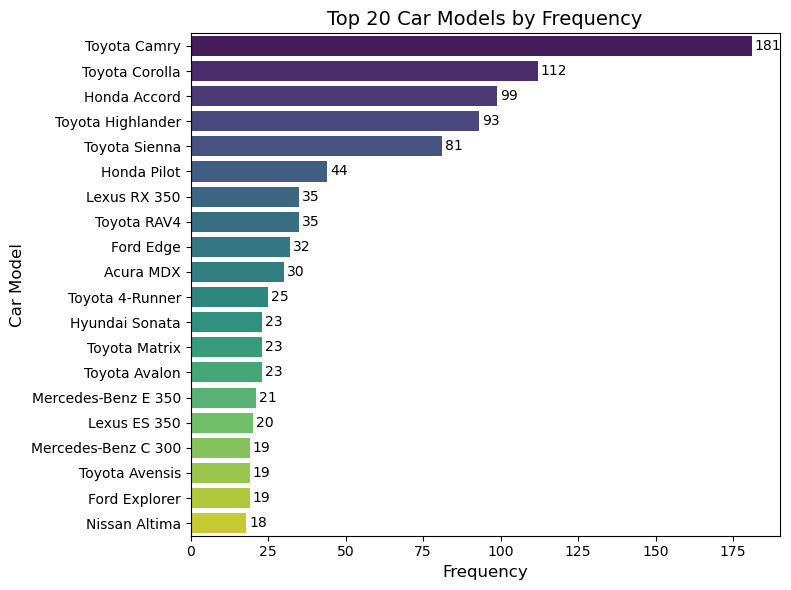

In [408]:
n = 20

# Combine Car_Brand and Car_Model to create a new feature 'CarName'
cars['CarName'] = cars['Car_Brand'] + ' ' + cars['Car_Model']

# Get the top car models
top_car_models = cars['CarName'].value_counts().head(n)

# Create a custom color palette
colors = sns.color_palette("viridis", n)

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_car_models.values, y=top_car_models.index, palette=colors)

# Add annotations for each bar
for i, (value, name) in enumerate(zip(top_car_models.values, top_car_models.index)):
    ax.text(value + 1, i, f'{value}', ha='left', va='center', fontsize=10)

plt.title(f'Top {n} Car Models by Frequency', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Car Model', fontsize=12)
plt.tight_layout()
plt.show()

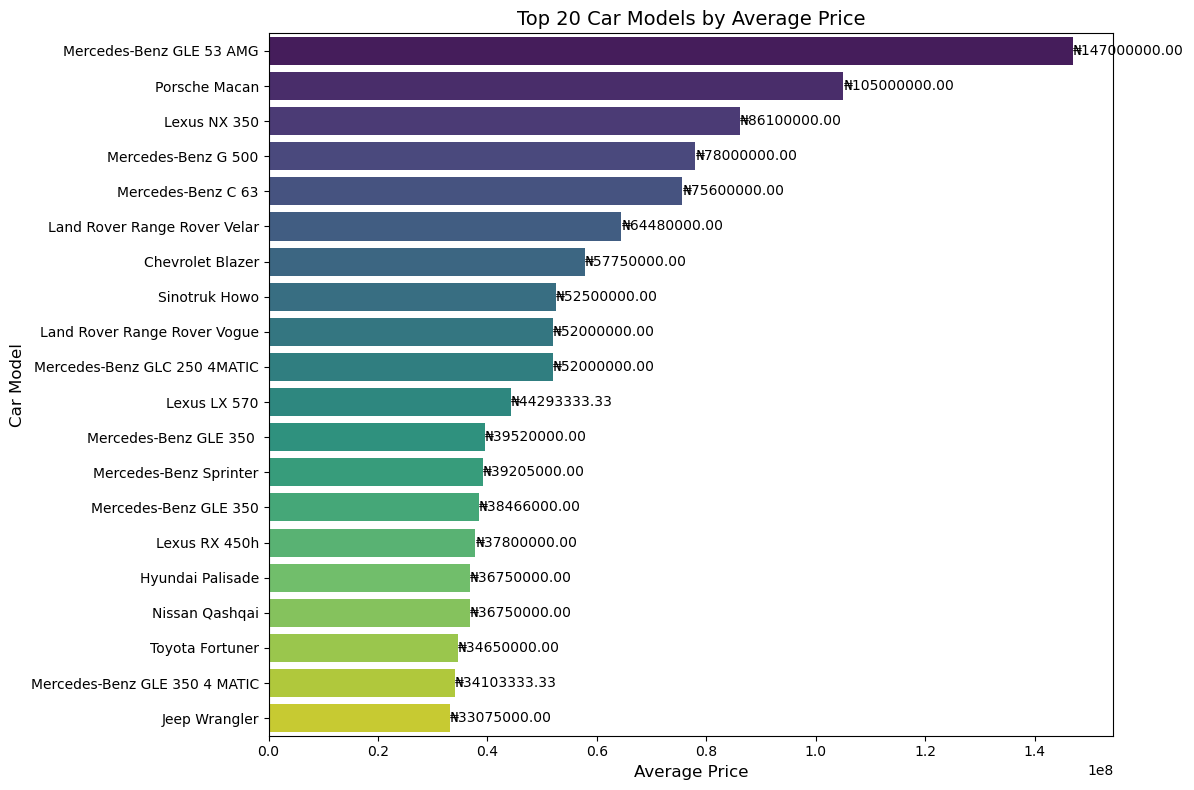

In [409]:
# Calculate average price for each car model
avg_prices_by_car = cars.groupby('CarName')['Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

# Create a custom color palette
colors = sns.color_palette("viridis", n)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_car_models.values, y=top_car_models.index, palette=colors)

# Add annotations for each bar
for i, (value, name) in enumerate(zip(top_car_models.values, top_car_models.index)):
    ax.text(value + 100, i, f'₦{value:.2f}', ha='left', va='center', fontsize=10)

plt.title(f'Top {n} Car Models by Average Price', fontsize=14)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Car Model', fontsize=12)
plt.tight_layout()
plt.show()

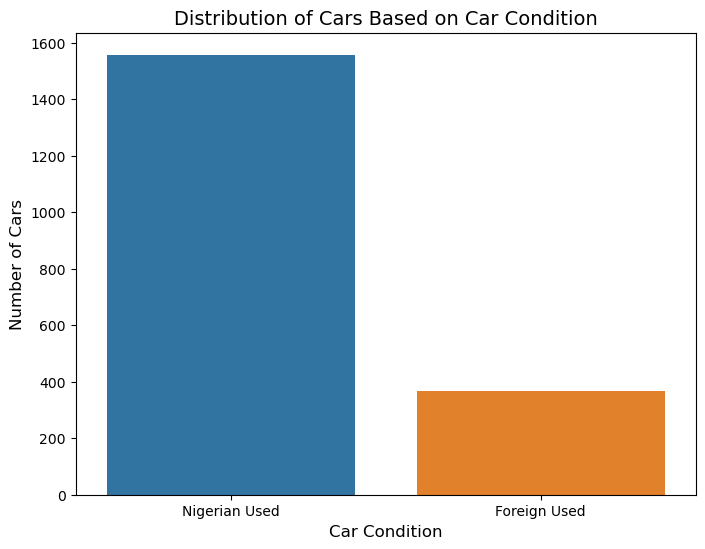

In [410]:
# Count plot for Car_Condition
plt.figure(figsize=(8, 6))
sns.countplot(x='Car_Condition', data=cars)
plt.title('Distribution of Cars Based on Car Condition', fontsize=14)
plt.xlabel('Car Condition', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.show()

In [411]:
cars['Car_Condition'].value_counts()

Car_Condition
Nigerian Used    1557
Foreign Used      367
Name: count, dtype: int64

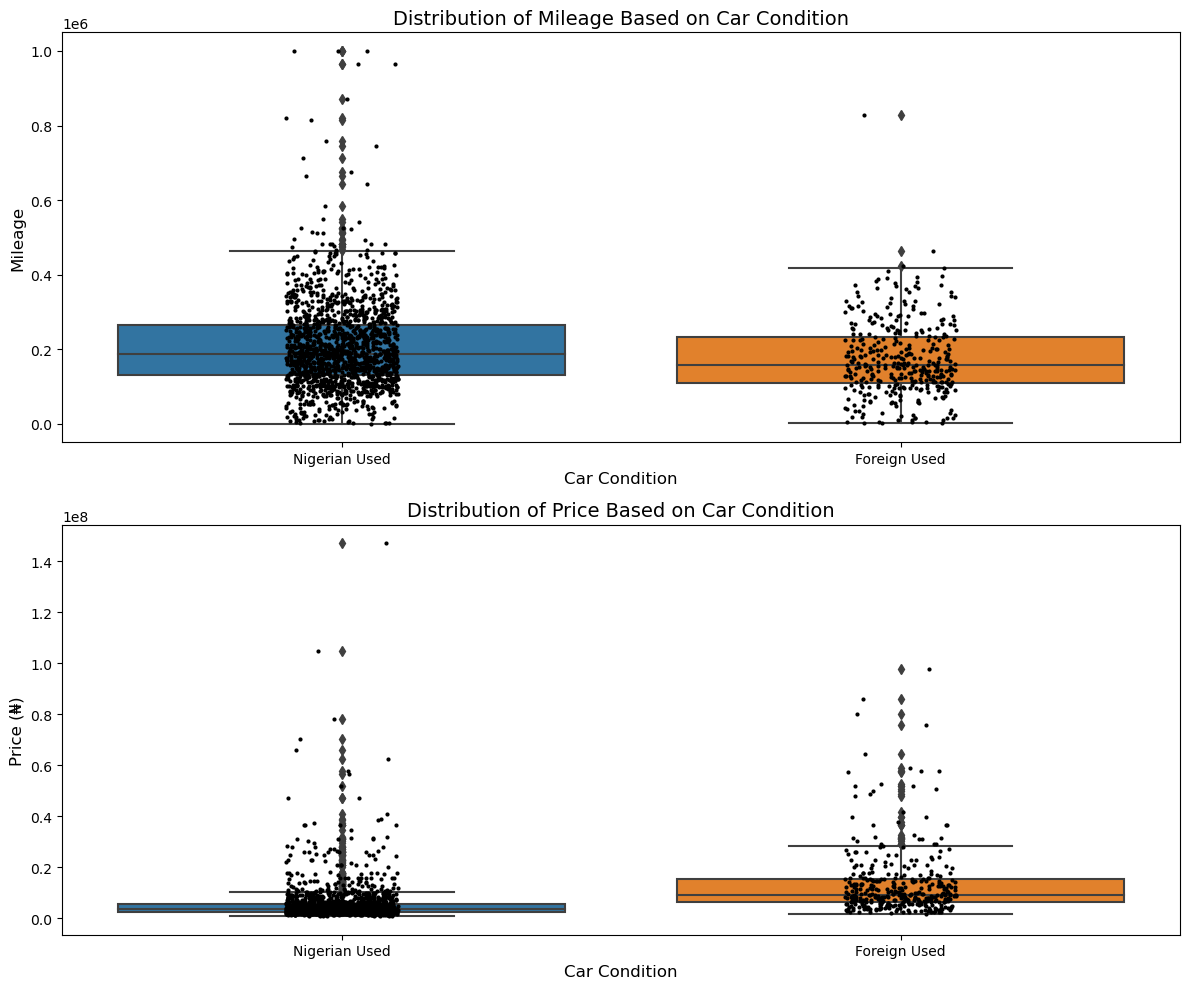

In [412]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Distribution of Mileage based on Car Condition
sns.boxplot(x='Car_Condition', y='Mileage', data=cars, ax=axes[0])
sns.stripplot(x='Car_Condition', y='Mileage', data=cars, color='black', size=3, jitter=True, ax=axes[0])
axes[0].set_title('Distribution of Mileage Based on Car Condition', fontsize=14)
axes[0].set_xlabel('Car Condition', fontsize=12)
axes[0].set_ylabel('Mileage', fontsize=12)

# Distribution of Price based on Car Condition
sns.boxplot(x='Car_Condition', y='Price', data=cars, ax=axes[1])
sns.stripplot(x='Car_Condition', y='Price', data=cars, color='black', size=3, jitter=True, ax=axes[1])
axes[1].set_title('Distribution of Price Based on Car Condition', fontsize=14)
axes[1].set_xlabel('Car Condition', fontsize=12)
axes[1].set_ylabel('Price (₦)', fontsize=12)
plt.tight_layout()
plt.show()

- Toyota emerges as a prominent and widely preferred car brand, reflecting its popularity and frequent usage in the dataset.
- Luxury brands such as Porsche Macan, Lexus NX, and Mercedes-Benz GLE notably command the highest average prices, a trend aligned with the expectations associated with premium vehicles.
- The dataset predominantly features Nigerian used cars, outnumbering foreign used cars.
- Interestingly, despite their higher prevalence, Nigerian used cars generally exhibit lower average prices compared to their foreign used counterparts, showcasing an intriguing dynamic in the pricing landscape.

## Feature Engineering

In [413]:
# Drop the 'CarName' feature
cars = cars.drop('CarName', axis=1)

In [414]:
# Apply logarithmic transformation to the target variable
cars['Price_log'] = np.log(cars['Price'])
# Drop the original price column
cars.drop(columns=['Price'], inplace=True)

In [415]:
cars.head()

,Car_Brand,Car_Model,Year,Car_Condition,Mileage,Price_log
0,Toyota,Corolla,2010,Nigerian Used,145695,15.850216
1,Ford,Edge,2011,Foreign Used,122250,16.130518
2,Honda,Accord,2010,Nigerian Used,126040,15.319588
3,Mercedes-Benz,C 280,2008,Nigerian Used,380085,15.725053
4,Toyota,Corolla,2007,Nigerian Used,299999,15.096444


In [416]:
cars.isnull().sum()

Car_Brand        0
Car_Model        0
Year             0
Car_Condition    0
Mileage          0
Price_log        0
dtype: int64

In [417]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cars[['Year', 'Mileage']])

# Update the DataFrame with scaled features
cars[['Year', 'Mileage']] = scaled_features

joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [418]:
cars.head()

,Car_Brand,Car_Model,Year,Car_Condition,Mileage,Price_log
0,Toyota,Corolla,0.381474,Nigerian Used,-0.484689,15.850216
1,Ford,Edge,0.602080,Foreign Used,-0.689153,16.130518
2,Honda,Accord,0.381474,Nigerian Used,-0.656100,15.319588
3,Mercedes-Benz,C 280,-0.059738,Nigerian Used,1.559434,15.725053
4,Toyota,Corolla,-0.280344,Nigerian Used,0.861002,15.096444


In [419]:
# Lowercase all column names
cars.columns = cars.columns.str.lower()

In [420]:
cars.columns

Index(['car_brand', 'car_model', 'year', 'car_condition', 'mileage',
       'price_log'],
      dtype='object')

In [421]:
# Encode 'Nigerian Used' as 1 and 'Foreign Used' as 2 for 'car_condition'
cars['car_condition_encoded'] = cars['car_condition'].map({'Nigerian Used': 1, 'Foreign Used': 2})

# Drop the original 'car_condition' column
cars.drop(columns=['car_condition'], inplace=True)

# One-hot encode 'car_brand' and 'car_model'
X = pd.get_dummies(cars, columns=['car_brand', 'car_model'], drop_first=False)

# Splitting the data into features (X) and target variable (y)
X = X.drop(columns=['price_log']) # Features
y = cars['price_log'] # Target variable

In [422]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1539, 361)
y_train shape: (1539,)
X_test shape: (385, 361)
y_test shape: (385,)


#### Random Forest

In [423]:
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Random Forest Mean Squared Error:", mse)
print("Random Forest Root Mean Squared Error:", rmse)
print("Random Forest R-squared:", r_squared)

Random Forest Mean Squared Error: 0.16095656779193465
Random Forest Root Mean Squared Error: 0.40119392791010017
Random Forest R-squared: 0.7641869970718707


#### Linear Regression

In [424]:
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_lr = lr_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculate Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mse_lr)

# Calculate R-squared
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Evaluation:")
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R-squared:", r2_lr)

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 9.26106713957632e+21
Root Mean Squared Error (RMSE): 96234438428.12364
R-squared: -1.3568132586708555e+22


#### XGBoost

In [425]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mse_xgb)

# Calculate R-squared
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Evaluation:")
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared:", r2_xgb)

XGBoost Model Evaluation:
Mean Squared Error (MSE): 0.12648072218495357
Root Mean Squared Error (RMSE): 0.3556412830155599
R-squared: 0.8146966021945274


#### Decision Tree

In [426]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree model
tree_model = DecisionTreeRegressor()

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_tree = tree_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_tree = mean_squared_error(y_test, y_pred_tree)

# Calculate Root Mean Squared Error (RMSE)
rmse_tree = np.sqrt(mse_tree)

# Calculate R-squared
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Model Evaluation:")
print("Mean Squared Error (MSE):", mse_tree)
print("Root Mean Squared Error (RMSE):", rmse_tree)
print("R-squared:", r2_tree)

Decision Tree Model Evaluation:
Mean Squared Error (MSE): 0.2775826423647252
Root Mean Squared Error (RMSE): 0.5268611224646635
R-squared: 0.5933213701390145


#### Hyperparameter Tuning for XGBoost

In [427]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and best scores
best_params = grid_search.best_params_
best_scores = grid_search.best_score_

# Train the XGBoost model with the best parameters
best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_xgb = best_xgb_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mse_xgb)

# Calculate R-squared
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Best Parameters:", best_params)
print("Best Mean Squared Error (MSE) during Grid Search:", -best_scores)
print("\nXGBoost Model Evaluation with Best Parameters:")
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared:", r2_xgb)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}
Best Mean Squared Error (MSE) during Grid Search: 0.1183986917977176

XGBoost Model Evaluation with Best Parameters:
Mean Squared Error (MSE): 0.12045612757342891
Root Mean Squared Error (RMSE): 0.34706790052297964
R-squared: 0.8235230686522662


In [428]:
# Initialize XGBoost model with the best parameters found
best_params = {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}
final_xgb_model = xgb.XGBRegressor(**best_params)

# Train the final model on the entire training dataset
final_xgb_model.fit(X_train, y_train)

# Predict on the test dataset
y_pred_test = final_xgb_model.predict(X_test)

# Evaluate the final model on the test dataset
mse_final = mean_squared_error(y_test, y_pred_test)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_test)

print("Final XGBoost Model Evaluation:")
print("Mean Squared Error (MSE):", mse_final)
print("Root Mean Squared Error (RMSE):", rmse_final)
print("R-squared:", r2_final)

Final XGBoost Model Evaluation:
Mean Squared Error (MSE): 0.12045612757342891
Root Mean Squared Error (RMSE): 0.34706790052297964
R-squared: 0.8235230686522662


In [429]:
# Apply the inverse transformation to the predicted values
y_pred_original_scale = np.exp(y_pred_test)

# Save the final XGBoost model using Joblib
joblib.dump(final_xgb_model, 'final_xgb_model.joblib')

['final_xgb_model.joblib']

In [430]:
# Apply the inverse transformation to the predicted values
y_pred_original_scale = np.exp(y_pred_test)

# Check a few predictions
for i in range(5):
    print(f"Original Prediction: {y_pred_test[i]}, Transformed Prediction: {y_pred_original_scale[i]}")

Original Prediction: 15.498699188232422, Transformed Prediction: 5382692.0
Original Prediction: 14.87755298614502, Transformed Prediction: 2892272.25
Original Prediction: 15.967744827270508, Transformed Prediction: 8604061.0
Original Prediction: 14.982518196105957, Transformed Prediction: 3212365.75
Original Prediction: 15.382756233215332, Transformed Prediction: 4793427.5
